In [7]:
import pandas as pd

In [8]:
data_raw = pd.read_csv('aisdk-2025-02-26.csv')
data = pd.DataFrame(data_raw)

In [9]:
print(data.head())

           # Timestamp Type of mobile       MMSI   Latitude  Longitude  \
0  26/02/2025 00:00:00        Class A  232008874  55.710755   4.727047   
1  26/02/2025 00:00:00   Base Station    2190064  56.716553  11.519025   
2  26/02/2025 00:00:00        Class A  219000873  56.990905  10.304557   
3  26/02/2025 00:00:00   Base Station    2194006  55.538870   5.033200   
4  26/02/2025 00:00:00        Class A  219006113  57.321248  11.126987   

          Navigational status  ROT  SOG    COG  Heading  ... Length  \
0  Restricted maneuverability  NaN  9.3  140.3    140.0  ...    NaN   
1               Unknown value  NaN  NaN    NaN      NaN  ...    NaN   
2      Under way using engine  NaN  0.0   41.4      NaN  ...    NaN   
3               Unknown value  NaN  NaN    NaN      NaN  ...    NaN   
4          Engaged in fishing  0.0  0.0  177.2    158.0  ...    NaN   

  Type of position fixing device Draught Destination  ETA  Data source type  \
0                      Undefined     NaN     Unkn

In [10]:
data = data.drop("IMO", axis=1) # Fjernes da det er en identifikator og ikke noget som vil skabe et mønster
data = data.drop("MMSI", axis=1) # Fjernes da det er en identifikator og ikke noget som vil skabe et mønster
data = data.drop("Callsign", axis=1) # Fjernes da det er en identifikator og ikke noget som vil skabe et mønster
data = data.drop("Name", axis=1) # Fjernes da det er en identifikator og ikke noget som vil skabe et mønster
data = data.drop("Type of position fixing device", axis=1) # Fjernes da dette kun siger noget om hvilket udstyr der bruges som navigationssystem
data = data.drop("Destination", axis=1) # Fjernes da mange skibe kan have uklar destination og mangler i mange tilfælde
data = data.drop("ETA", axis=1) # Fiskeskibe har umiddelbart ikke en ETA da de ikke er på en fast rute og har fleksible ankomster
data = data.drop("Data source type", axis=1) # Fjernes da dette kun siger noget om hvilken type datakilde der er brugt
data = data.drop("A", axis=1) # Umiddelbart fjernes A,B,C og D da disse kun fortæller om størrelsen af skibet
data = data.drop("B", axis=1)
data = data.drop("C", axis=1)
data = data.drop("D", axis=1)

# Timestamp kan være nyttig da vi kan analysere fiskeri på bestemte tidspunkter af døgnet, måske man fisker specifikke tidspunkter af døgnet
# Type of Mobile er vigtig, da vi skal fokusere på Class B skibe, som er fiskeskibe
# Longitude og Latitude er vigtige da vi skal vide hvor skibene er
# SOG(speed over Ground) og COG(course over Ground) og ROT(Rate of Turn) er vigtige da vi skal vide hvor hurtigt skibene sejler og i hvilken retning da det kan fortælle os om fiskerimønstre
# Navigational status er vigtig, da vi skal træne modellen til at forstå hvornår skibene fisker
# Headning kan måske også være en vigtig feature, da den kan hjælpe med at forstå fiskerimønstre
# Ship type kan også være vigtig, da den skal hjælpe med at sige, om det er en fiskerbåd eller ej
# Draught skibets dybgang kan være relevant, da fiskeskibe ofte ændrer lastning når de fisker



# Size kan måske være en faktor da størrelsen af skibet kan indikere, om det er egnet til fiskeri
# #Length and width kan måske godt slettes, da vi allerede kender til en hvis størrelse ud fra skibes type

print(data.head())

           # Timestamp Type of mobile   Latitude  Longitude  \
0  26/02/2025 00:00:00        Class A  55.710755   4.727047   
1  26/02/2025 00:00:00   Base Station  56.716553  11.519025   
2  26/02/2025 00:00:00        Class A  56.990905  10.304557   
3  26/02/2025 00:00:00   Base Station  55.538870   5.033200   
4  26/02/2025 00:00:00        Class A  57.321248  11.126987   

          Navigational status  ROT  SOG    COG  Heading  Ship type Cargo type  \
0  Restricted maneuverability  NaN  9.3  140.3    140.0  Undefined        NaN   
1               Unknown value  NaN  NaN    NaN      NaN  Undefined        NaN   
2      Under way using engine  NaN  0.0   41.4      NaN  Undefined        NaN   
3               Unknown value  NaN  NaN    NaN      NaN  Undefined        NaN   
4          Engaged in fishing  0.0  0.0  177.2    158.0  Undefined        NaN   

   Width  Length  Draught  
0    NaN     NaN      NaN  
1    NaN     NaN      NaN  
2    NaN     NaN      NaN  
3    NaN     NaN      

In [11]:
print(data.tail())

                  # Timestamp Type of mobile   Latitude  Longitude  \
17350102  26/02/2025 23:59:58        Class A  56.893252  12.488335   
17350103  26/02/2025 23:59:58        Class A  54.653450  11.351333   
17350104  26/02/2025 23:59:58        Class A  54.653450  11.351333   
17350105  26/02/2025 23:59:58        Class A  55.566745  14.958200   
17350106  26/02/2025 23:59:58        Class A  57.592850   9.964867   

             Navigational status  ROT   SOG    COG  Heading  Ship type  \
17350102  Under way using engine  0.0   0.0  331.0    120.0      Pilot   
17350103  Under way using engine  0.0   0.0   52.5     50.0  Passenger   
17350104  Under way using engine  0.0   0.0   52.5     50.0  Passenger   
17350105  Under way using engine  0.0  12.4  245.6    245.0     Tanker   
17350106      Engaged in fishing  0.0   0.0    NaN    313.0  Undefined   

                         Cargo type  Width  Length  Draught  
17350102                        NaN    5.0    17.0      NaN  
17350103  

In [12]:
# Tæl antallet af NaN-værdier i hver kolonne
nan_counts = data.isna().sum()

# Vis resultatet
print(nan_counts)

# Timestamp                   0
Type of mobile                0
Latitude                      0
Longitude                     0
Navigational status           0
ROT                     5141406
SOG                     1326871
COG                     2257124
Heading                 3513237
Ship type                     0
Cargo type             14684055
Width                   1633566
Length                  1620790
Draught                 4502763
dtype: int64


In [13]:
# Behold kun rækker hvor 'Ship_Type' er 'Class B'
df_filtered = data[data['Type of mobile'] == 'Class B']

# Vis den filtrerede DataFrame
print(df_filtered)

                  # Timestamp Type of mobile   Latitude  Longitude  \
81        26/02/2025 00:00:00        Class B  57.592485   9.954765   
83        26/02/2025 00:00:00        Class B  57.592485   9.954765   
96        26/02/2025 00:00:00        Class B  56.704782   8.223750   
188       26/02/2025 00:00:00        Class B  55.040675  10.661863   
189       26/02/2025 00:00:00        Class B  55.040675  10.661863   
...                       ...            ...        ...        ...   
17349957  26/02/2025 23:59:58        Class B  57.592440   9.962563   
17349990  26/02/2025 23:59:58        Class B  56.610555  10.304320   
17349993  26/02/2025 23:59:58        Class B  55.760063  12.603470   
17350012  26/02/2025 23:59:58        Class B  55.064335  15.136117   
17350017  26/02/2025 23:59:58        Class B  55.217173  11.739497   

         Navigational status  ROT  SOG    COG  Heading  Ship type Cargo type  \
81             Unknown value  NaN  0.1   61.4      NaN  Undefined        NaN   

In [14]:
total_samples = df_filtered.shape[0]
print(f"Totalt antal samples: {total_samples}")

Totalt antal samples: 510022


In [15]:
print(df_filtered.head())

             # Timestamp Type of mobile   Latitude  Longitude  \
81   26/02/2025 00:00:00        Class B  57.592485   9.954765   
83   26/02/2025 00:00:00        Class B  57.592485   9.954765   
96   26/02/2025 00:00:00        Class B  56.704782   8.223750   
188  26/02/2025 00:00:00        Class B  55.040675  10.661863   
189  26/02/2025 00:00:00        Class B  55.040675  10.661863   

    Navigational status  ROT  SOG   COG  Heading  Ship type Cargo type  Width  \
81        Unknown value  NaN  0.1  61.4      NaN  Undefined        NaN    NaN   
83        Unknown value  NaN  0.1  61.4      NaN  Undefined        NaN    NaN   
96        Unknown value  NaN  0.0  14.4     14.0  Undefined        NaN    NaN   
188       Unknown value  NaN  0.0   0.0      NaN  Undefined        NaN    NaN   
189       Unknown value  NaN  0.0   0.0      NaN  Undefined        NaN    NaN   

     Length  Draught  
81      NaN      NaN  
83      NaN      NaN  
96      NaN      NaN  
188     NaN      NaN  
189    

In [16]:
# Tæl antallet af NaN-værdier i hver kolonne
nan_counts_filtered = df_filtered.isna().sum()

# Vis resultatet
print(nan_counts_filtered)

# Timestamp                 0
Type of mobile              0
Latitude                    0
Longitude                   0
Navigational status         0
ROT                    509488
SOG                      2527
COG                    207106
Heading                455726
Ship type                   0
Cargo type             508112
Width                   37035
Length                  37935
Draught                508285
dtype: int64


In [17]:
# Umiddelbare fund, Class B indeholder mange NaN-værdier for ROT, COG, Heading, Cargo type og Draught

C:\Users\alext\AppData\Local\Temp\ipykernel_10304\1348758329.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtered["# Timestamp"] = pd.to_datetime(df_filtered["# Timestamp"], errors='coerce')
C:\Users\alext\AppData\Local\Temp\ipykernel_10304\1348758329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["# Timestamp"] = pd.to_datetime(df_filtered["# Timestamp"], errors='coerce')


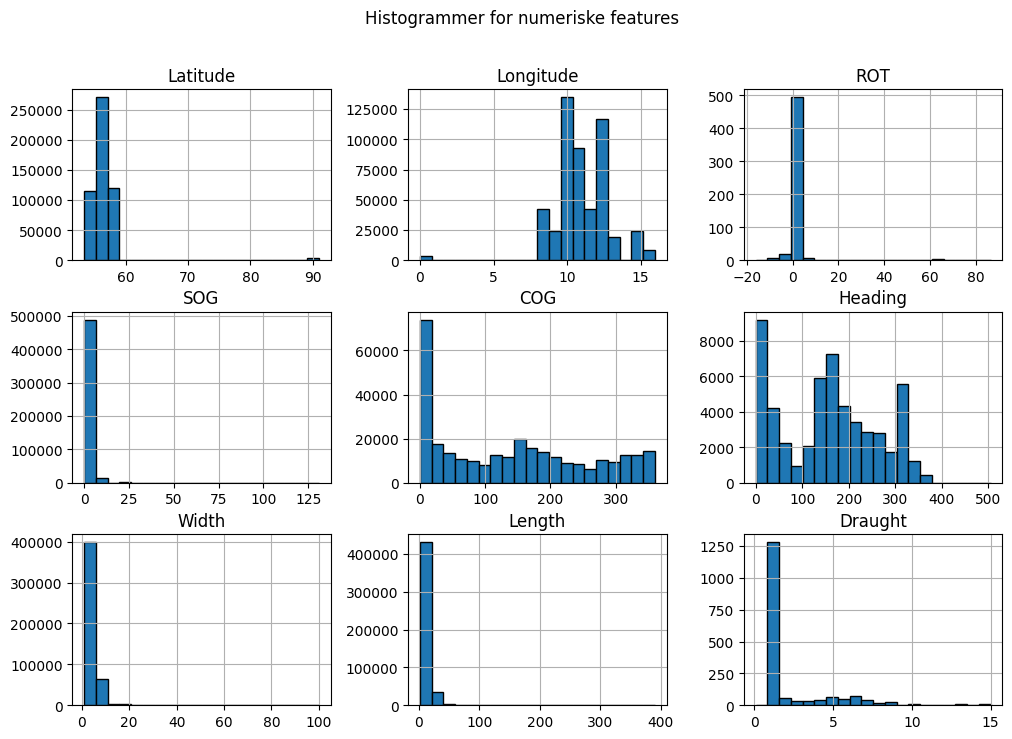

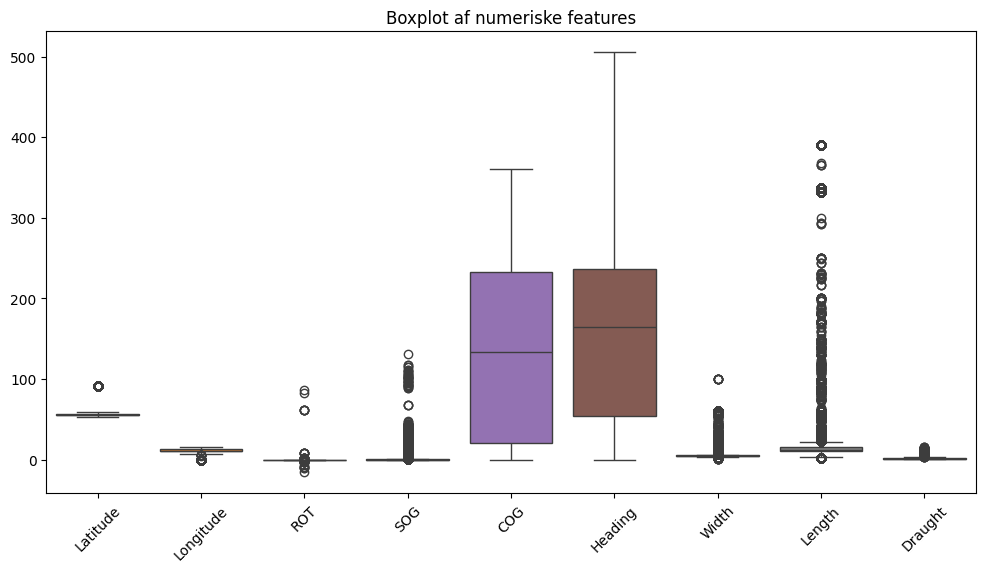

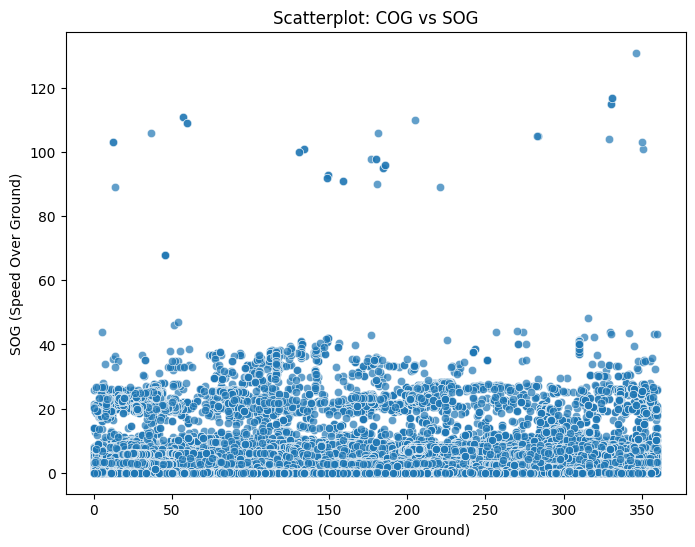

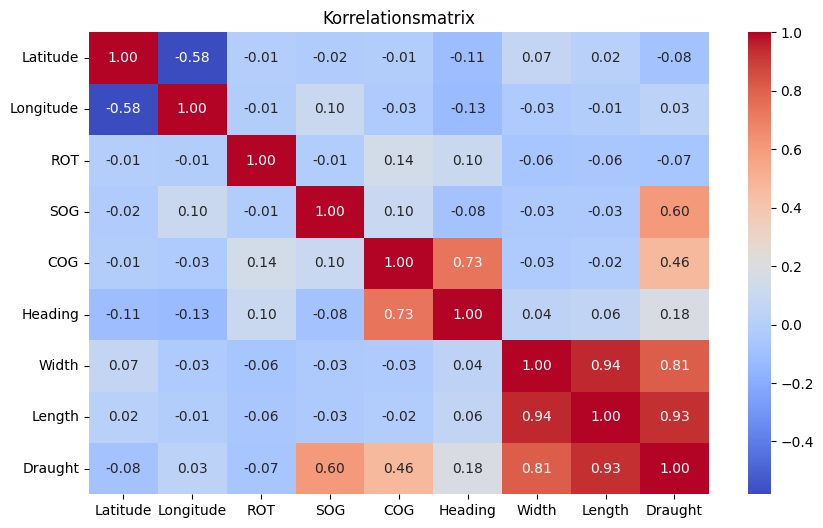

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konverter Timestamp til datetime format (hvis ikke allerede gjort)
df_filtered["# Timestamp"] = pd.to_datetime(df_filtered["# Timestamp"], errors='coerce')

# Definér numeriske kolonner
numeriske_kolonner = ["Latitude", "Longitude", "ROT", "SOG", "COG", "Heading", "Width", "Length", "Draught"]

# **1. Histogrammer for numeriske features**
df_filtered[numeriske_kolonner].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogrammer for numeriske features")
plt.show()

# **2. Boxplots for at identificere outliers**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[numeriske_kolonner])
plt.xticks(rotation=45)
plt.title("Boxplot af numeriske features")
plt.show()

# **3. Scatterplot: Speed Over Ground (SOG) vs Course Over Ground (COG)**
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_filtered["COG"], y=df_filtered["SOG"], alpha=0.7)
plt.xlabel("COG (Course Over Ground)")
plt.ylabel("SOG (Speed Over Ground)")
plt.title("Scatterplot: COG vs SOG")
plt.show()

# **4. Heatmap for korrelationer**
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered[numeriske_kolonner].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()
